In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [162]:
file_list

['test_10K_aoxu_nnetregCG_100K_model_predictions.csv',
 'test_10K_aoxu_nnetregCG_1M_model_predictions.csv',
 'test_10K_aoxu_nnetregCG_500K_predictions.csv']

In [203]:
# Define the folder path
folder_path = "../results"

# Get the list of .csv files containing "aoxu" keyword
# file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv") and "aoxu" in file]
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv") and "test_1M_nnetregCG" in file]
# Initialize an empty DataFrame to store the data
df_combined = pd.DataFrame()

# Iterate over each file
for file in file_list:
    # Load the .csv file
    name = file.split('.')[0]
    file_path = os.path.join(folder_path, file)
    # df = pd.read_csv(file_path)
    df = pd.read_csv(file_path, header=None)
    # Select columns by index
    df_selected = df.iloc[:, [0, 7, 27]]

    # Rename the selected columns
    df_selected.columns = ['molid', 'Score', f'{name}']

    
    # Extract the required columns
    # df_selected = df[['molid', 'Score', df.columns[-1]]]

    if 'molid' not in df_combined.columns:
        df_combined = df_selected
    else:
        # Merge the selected data with the combined DataFrame
        df_combined = pd.merge(df_combined, df_selected, on=['molid', 'Score'], how='outer')

# Display the combined DataFrame
df_combined

,molid,Score,test_1M_nnetregCG_500K,test_1M_nnetregCG_100K,test_1M_nnetregCG_1M
0,2233864,-23.7986,-19.8766,-21.7302,-22.3329
1,2777538,-26.9739,-15.1591,-20.2613,-20.4628
2,7568839,-26.0846,-19.0672,-16.9751,-19.8575
3,5277262,-23.3431,-20.2536,-19.6218,-23.4757
4,9523219,-23.0818,-14.1825,-16.8371,-15.4657
...,...,...,...,...,...
999995,9170891,-24.9092,-15.7515,-15.4692,-18.8768
999996,3551056,-23.1898,-15.0757,-14.9032,-19.0095
999997,3779685,-24.9008,-19.0909,-20.5457,-23.5167
999998,6960287,-28.6862,-19.3260,-16.6284,-17.9967


In [ ]:
rf_df = pd.read_csv('../results/test_1M_results.csv')
df_combined['rf_500K'] = train_df['RF_1M_pred']

In [14]:
df_combined = pd.read_csv('../results/val_10K_results.csv')
df_combined.drop(['RF_pred'], inplace=True, axis=1)
df_combined.rename(columns={'score': 'Score'}, inplace=True)
df_combined

,molid,Score,RF_10K_pred,RF_100K_pred,RF_1M_pred,RF_500K_pred
0,EN_m_22bbb_5803X18326__s12876804_s4117038_s-1,-25.632725,-18.984493,-18.380507,-18.626439,-18.626439
1,EN_m_22bbb_5803X18326__s13193988_s6108868_s-1,-23.028124,-19.501194,-17.387981,-18.380566,-18.380566
2,EN_m_22bbb_5803X18326__s16608592_s6174706_s-1,-20.787680,-19.510435,-18.610886,-18.061249,-18.061249
3,EN_m_22bbb_5803X18326__s13776140_s6546426_s-1,-20.353279,-18.632625,-18.784252,-19.757729,-19.757729
4,EN_m_7bmb_867X3692__s15493990_s5992_s-1,-18.782646,-18.509259,-22.228657,-17.183243,-17.183243
...,...,...,...,...,...,...
9995,EN_m_280130bbb_25554X204__s17874382_s17857256_s-1,-10.929080,-17.470273,-19.384040,-17.511709,-17.511709
9996,EN_m_280130bbb_25554X204__s17874382_s17857498_s-1,-13.383339,-16.798122,-18.934789,-18.192953,-18.192953
9997,EN_m_280130bbb_25554X204__s17875036_s17857562_s-1,-13.114769,-18.071599,-19.275804,-17.780584,-17.780584
9998,EN_m_280130bbb_25554X204__s17875234_s17857358_s-1,-22.011690,-17.063822,-17.152646,-18.266656,-18.266656


## compute the R2 score

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score

# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Compute R^2 score
    r2 = r2_score(df_combined['Score'], df_combined[column])

    # Compute Q^2 score
    q2 = explained_variance_score(df_combined['Score'], df_combined[column])

    print(f"Column: {column}")
    print(f"R^2 Score: {r2}")
    print(f"Q^2 Score: {q2}")
    print()


In [ ]:
import seaborn as sns
# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Set the style of the plot
    sns.set(style="ticks")
    pair_plot = sns.pairplot(df_combined, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
    # Set the plot title
    pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    # Save the plot
    plt.savefig(f'./analysis{column}_pairplot.png')
    plt.show()

### Take the .tab with training set predictions and load into a dataframe

In [192]:
def plot_pairplot(df, column, plot_type='pairplot'):
    # Set the style of the plot
    sns.set(style="ticks")
    if plot_type == 'pairplot':
        pair_plot = sns.pairplot(df, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
        # Set the plot title
        pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    elif plot_type == 'jointplot':
        pair_plot = sns.jointplot(x=f'{column}', y='Score', data=df, kind='reg', height=5)

        # Set the same limits for x and y axis
        limits = [min(df[column].min(), df['Score'].min()), max(df[column].max(), df['Score'].max())]
        pair_plot.ax_joint.set_xlim(limits)
        pair_plot.ax_joint.set_ylim(limits)

        pair_plot.fig.suptitle('Joint Plot of Score and Score_predict', size=15, y=1.02)

    # Save the plot
    plt.savefig(f'../analysis/{column}_{plot_type}.png')
    # plt.show()

def select_top_n(df, column, n):
    # Sort the DataFrame based on the column
    df_sorted = df.sort_values(by=column, ascending=True)
    # Select the top n rows
    df_top_n = df_sorted.iloc[:n, :]
    return df_top_n

def plot_hist_score(df, n):
    top_score_from_each_file = []
    for column in df.columns[1:]:
        # Sort the DataFrame based on the column
        df_sorted = df.sort_values(by=column, ascending=True)
        # Select the top n rows
        df_top_n = df_sorted.iloc[:n, :]
        # Append the top score to the list
        top_score_from_each_file.append(df_top_n['Score'].values)
    sns.histplot(top_score_from_each_file)

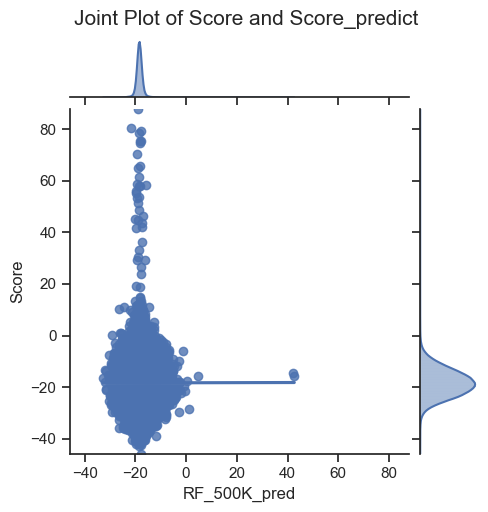

In [199]:
train_df = pd.read_csv('../results/test_1M_results.csv')
plot_pairplot(train_df, column=train_df.columns[-1], plot_type='jointplot')

In [200]:
explained_variance_score(train_df['Score'], train_df[train_df.columns[-1]])

-0.061916993948422094

In [206]:
df_combined.columns
df_combined['RF_500K'] = train_df[train_df.columns[-1]] 

<Figure size 1500x1500 with 0 Axes>

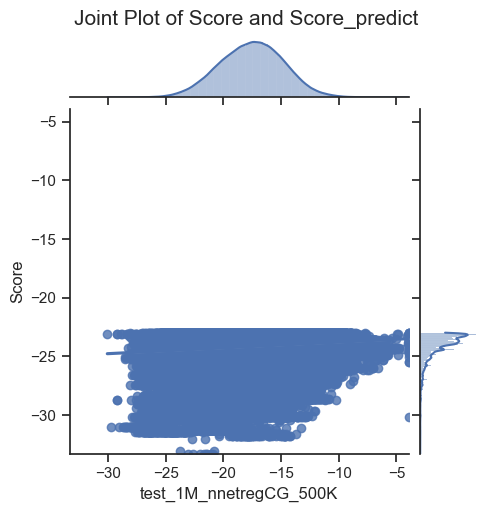

In [195]:
plt.figure(figsize=(15, 15)) 
plot_pairplot(df_combined, column='test_1M_nnetregCG_500K', plot_type='jointplot')

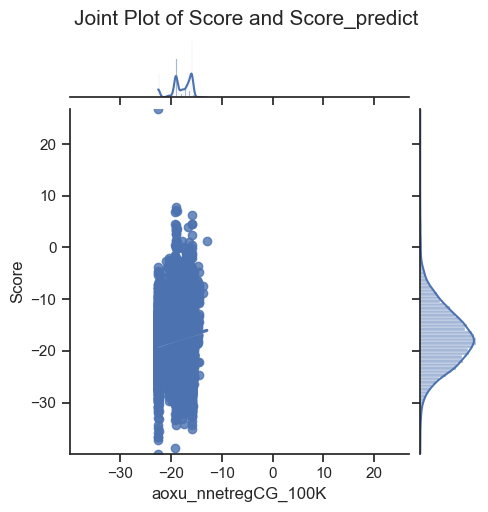

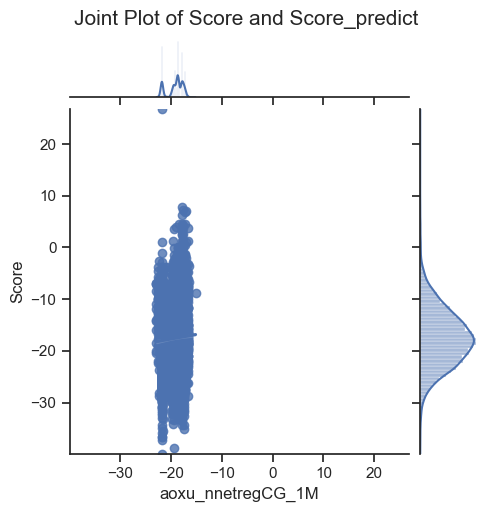

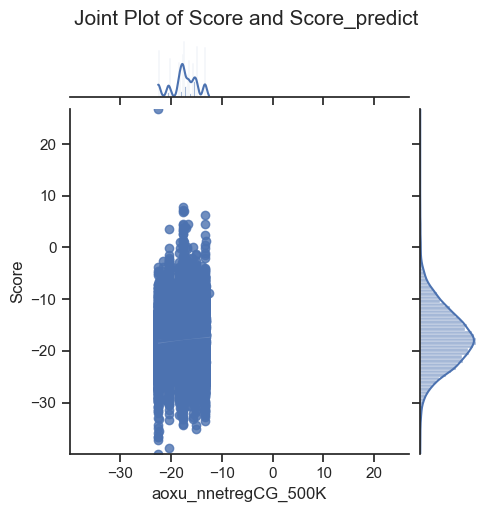

In [197]:
for column in df_combined.columns[2:]:
    plot_pairplot(df_combined, column, plot_type='jointplot')

In [14]:
top_molecules = df_combined.sort_values('Score', ascending=True).iloc[:10]
top_molecules

,molid,Score,RF_10K_pred,RF_100K_pred,RF_1M_pred
133,EN_m_22bbb_5803X18326__s14772360_s12889990_s-1,-39.941085,-19.226570,-18.543979,-18.543979
6066,EN_m_527dbb_843X12060__s4059160_s14936312_s-1,-38.703960,-16.973682,-17.053649,-17.053649
758,EN_m_22bbb_5803X18326__s20821052_s11723338_s-1,-37.287924,-17.665629,-18.721919,-18.721919
789,EN_m_22bbb_5803X18326__s20821052_s60236_s-1,-36.611349,-19.705071,-17.301809,-17.301809
780,EN_m_22bbb_5803X18326__s20821052_s300374_s-1,-36.591679,-15.668508,-18.296789,-18.296789
785,EN_m_22bbb_5803X18326__s20821052_s16946146_s-1,-35.915964,-19.241459,-24.621746,-24.621746
774,EN_m_22bbb_5803X18326__s20821052_s17830656_s-1,-35.418796,-18.963113,-16.479262,-16.479262
4636,EN_m_27bbd_10224X2510__s20842774_s21039156_s-1,-35.094195,-18.974434,-17.691892,-17.691892
770,EN_m_22bbb_5803X18326__s20821052_s14033842_s-1,-34.866010,-18.828734,-18.860732,-18.860732
775,EN_m_22bbb_5803X18326__s20821052_s8698604_s-1,-34.329340,-18.158973,-18.280196,-18.280196


In [18]:
df_combined.describe()

,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-17.541456,-18.387194,-18.325016,-18.325016
std,5.488349,1.114042,1.252124,1.252124
min,-39.941085,-24.397076,-26.112190,-26.112190
25%,-21.353589,-19.094432,-18.970246,-18.970246
50%,-17.733554,-18.422903,-18.347580,-18.347580
75%,-13.972536,-17.707946,-17.720619,-17.720619
max,26.725512,-7.554257,-7.201571,-7.201571


<AxesSubplot:xlabel='Score', ylabel='aoxu_nnetregCG_1M'>

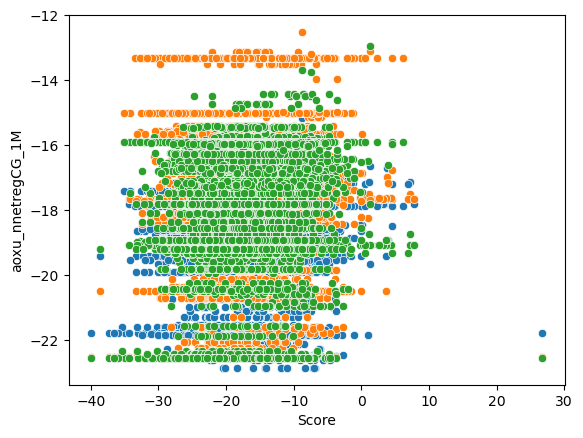

In [38]:
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_1M')
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_500K')
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_100K')

In [84]:
df_combined

,molid,Score,test_1M_nnetregCG_500K,test_1M_nnetregCG_100K
0,2233864,-23.7986,-19.8766,-21.7302
1,2777538,-26.9739,-15.1591,-20.2613
2,7568839,-26.0846,-19.0672,-16.9751
3,5277262,-23.3431,-20.2536,-19.6218
4,9523219,-23.0818,-14.1825,-16.8371
...,...,...,...,...
999995,9170891,-24.9092,-15.7515,-15.4692
999996,3551056,-23.1898,-15.0757,-14.9032
999997,3779685,-24.9008,-19.0909,-20.5457
999998,6960287,-28.6862,-19.3260,-16.6284


In [207]:
n = int(df_combined.shape[0] * 0.01)
top_score_df = pd.DataFrame()
for column in df_combined.columns[1:]:
    # Sort the DataFrame based on the column
    df_top_n = select_top_n(df_combined, column, n)
    top_score_df[column] = df_top_n['Score'].values


In [138]:
top_score_df

,Score,test_1M_nnetregCG_500K,test_1M_nnetregCG_100K,test_1M_nnetregCG_1M
0,-33.3155,-23.1206,-23.3584,-23.9696
1,-33.3155,-30.9897,-25.2035,-26.5708
2,-33.3155,-28.7065,-26.5708,-26.5708
3,-33.3155,-23.1206,-24.5168,-26.5708
4,-33.2938,-28.7065,-23.1206,-26.5708
...,...,...,...,...
9995,-27.8178,-28.3418,-23.9537,-26.4203
9996,-27.8178,-25.0727,-23.9493,-25.2728
9997,-27.8178,-24.9508,-23.5051,-23.3821
9998,-27.8178,-24.4078,-23.6441,-24.0484


In [27]:
# Sort the DataFrame based on the column
column = "RF_10K_pred"
n=100
df_sorted = df_combined.sort_values(by=column, ascending=True)
# Select the top n rows
# df_combined.describe()
df_top_n = df_sorted.iloc[:n, :]
df_top_n.describe()

,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
count,100.000000,100.000000,100.000000,100.000000
mean,-17.876589,-21.437902,-18.260977,-18.260977
std,5.526923,0.646788,1.655888,1.655888
min,-33.157467,-24.397076,-22.250054,-22.250054
25%,-21.405226,-21.623199,-19.076309,-19.076309
50%,-17.784434,-21.204543,-18.474448,-18.474448
75%,-13.994016,-21.014009,-17.835487,-17.835487
max,-5.654288,-20.900818,-8.295895,-8.295895


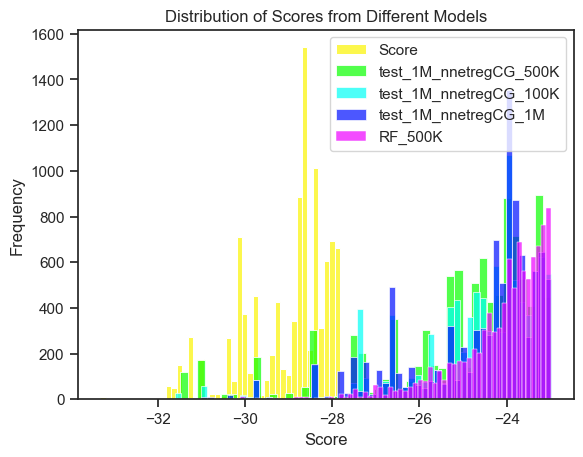

In [208]:
colors = sns.color_palette('hsv', len(top_score_df.columns))  # Generates distinct colors
for i, column in enumerate(top_score_df.columns):
    sns.histplot(top_score_df[column], kde=False, color=colors[i], label=column, alpha=0.7)

plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores from Different Models')
plt.show()

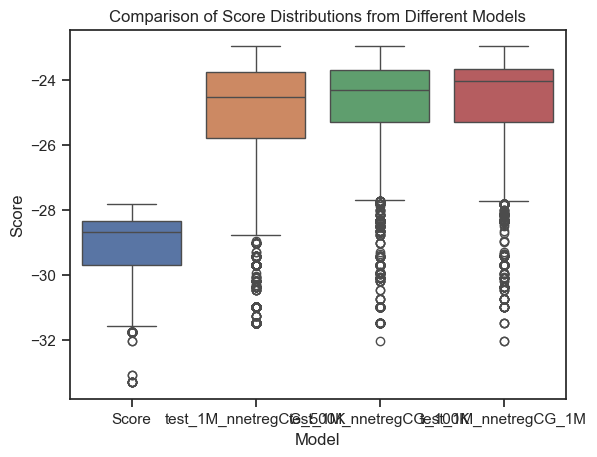

In [140]:
sns.boxplot(data=top_score_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Score Distributions from Different Models')
plt.show()


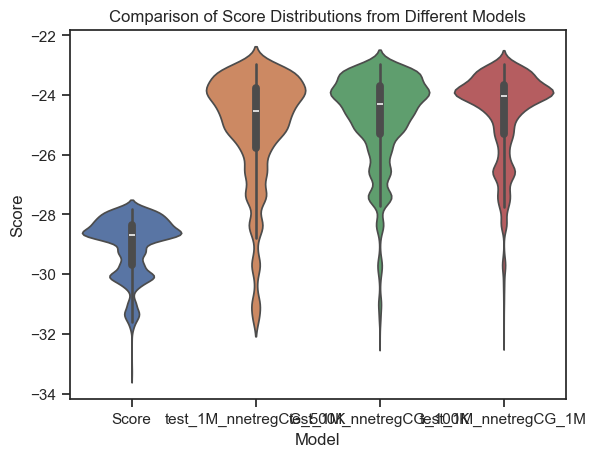

In [141]:
sns.violinplot(data=top_score_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Score Distributions from Different Models')
plt.show()

## Compute the percentage of top molecules found 

In [216]:
n = 10000
top_n_by_score = df_combined.sort_values(by='Score', ascending=True).head(n)
top_n_by_score

,molid,Score,test_1M_nnetregCG_500K,test_1M_nnetregCG_100K,test_1M_nnetregCG_1M,RF_500K
620057,3052395,-33.3155,-21.9815,-20.4409,-20.8826,-18.614936
127688,3052381,-33.3155,-20.9084,-18.3742,-22.2872,-18.467884
235036,3052392,-33.3155,-21.4769,-20.3403,-21.2596,-17.795669
900063,3052387,-33.3155,-22.5851,-24.0779,-20.8458,-19.177388
125685,3194272,-33.2938,-21.6916,-20.7870,-21.0967,-19.221895
...,...,...,...,...,...,...
625578,1814688,-27.8178,-22.4336,-24.3527,-25.8558,-17.918011
274686,1815214,-27.8178,-22.0318,-22.8476,-24.8134,-17.525204
53932,1814544,-27.8178,-22.9168,-22.6485,-25.3705,-17.929406
276298,1814194,-27.8178,-24.0002,-22.9206,-26.2727,-20.059385


In [217]:
prediction_columns = ['aoxu_nnetregCG_100K', 'aoxu_nnetregCG_1M', 'aoxu_nnetregCG_500K']
prediction_columns = ['RF_10K_pred', 'RF_100K_pred', 'RF_500K_pred']
prediction_columns = ['test_1M_nnetregCG_100K',	'test_1M_nnetregCG_500K', 'test_1M_nnetregCG_1M', 'RF_500K']
top_n_by_predictions = {col: df_combined.sort_values(by=col, ascending=True).head(n) for col in prediction_columns}

In [218]:
df_combined['Score'].value_counts().sort_index()

Score
-33.3155       4
-33.2938       4
-33.1032       2
-32.0542       2
-31.7724      59
            ... 
-22.9791      19
-22.9790       4
-22.9787       7
-22.9786      59
-22.9785    2022
Name: count, Length: 11145, dtype: int64

In [219]:
true_top_n_molids = set(top_n_by_score['molid'])

intersections = {col: true_top_n_molids.intersection(set(top_n_df['molid'])) 
                 for col, top_n_df in top_n_by_predictions.items()}


In [220]:
for col, intersection in intersections.items():
    print(f"Intersection for {col}: {intersection}")
    print(f"Number of molecules in intersection for {col}: {len(intersection)}")
    print(f"proportion of molecules in intersection for {col}: {len(intersection)/n}")

Intersection for test_1M_nnetregCG_100K: {2127877, 2129938, 2580503, 1093661, 2820126, 4565023, 2125859, 2914343, 2129961, 2129964, 2580525, 2125871, 1204273, 2820152, 4567096, 2914362, 2127933, 2523206, 2580550, 2523208, 4567113, 2127954, 2125919, 2127967, 4567137, 2130024, 2820204, 2820205, 2130038, 2717816, 2127993, 2523261, 2128004, 2820230, 2523285, 2523296, 4565156, 2128038, 2125993, 2820275, 1204404, 2130108, 2130109, 4567244, 2128079, 999638, 2128086, 2580702, 2126051, 2128099, 2820327, 2126056, 2126059, 999674, 2126079, 4565256, 2126091, 2820364, 2128141, 1204498, 2820373, 1204505, 4567333, 2580777, 1204529, 1204533, 2130230, 4565303, 4567355, 1204551, 2130263, 1204567, 2580836, 2580837, 2613606, 2128234, 999788, 2130316, 2820493, 2130318, 1204624, 2820497, 1204633, 2130332, 2820510, 999838, 790944, 2130337, 2820520, 2820521, 2820523, 2128299, 7979437, 790961, 4567476, 790965, 2820540, 2820544, 2820545, 4565446, 4565448, 2130382, 790991, 790995, 2128346, 2130415, 999920, 99992

## Compare the molecule similaries 

In [124]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

sdf_file = '../../data/selected_test_1M_aoxu_nnetregCG_500K_predictions_top.sdf'
supplier = Chem.SDMolSupplier(sdf_file)
molecules = [mol for mol in supplier if mol is not None]

fingerprints = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules]

num_molecules = len(fingerprints)
similarity_matrix = [[0] * num_molecules for _ in range(num_molecules)]

for i in range(num_molecules):
    for j in range(i, num_molecules):
        similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # Symmetric matrix

(109, 109)


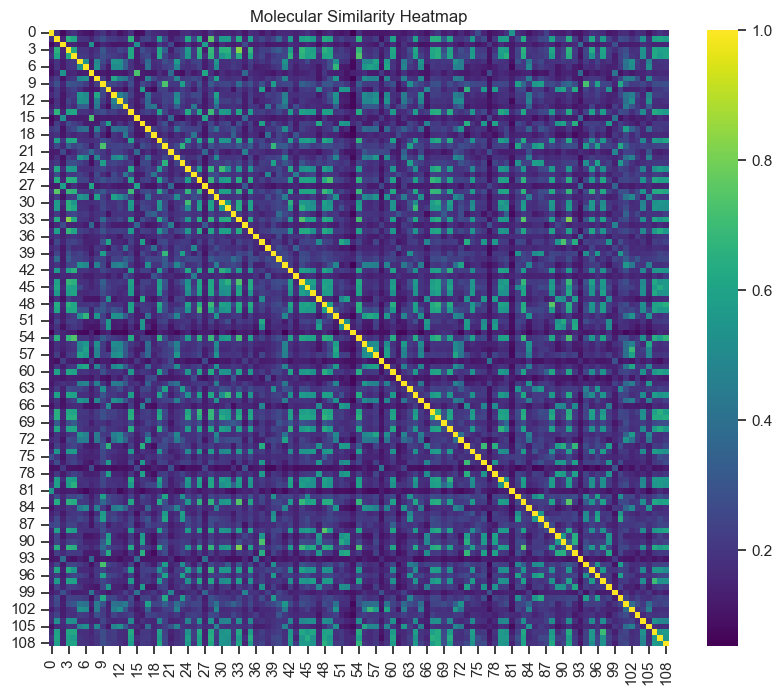

In [125]:
similarity_df = pd.DataFrame(similarity_matrix)
print(similarity_df.shape)
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(similarity_df, annot=False, cmap='viridis')
plt.title('Molecular Similarity Heatmap')
plt.show()

In [130]:
threshold = 0.6
count = (similarity_df > threshold).sum().sum()
print(count)
print(count/num_molecules**2)


671
0.05647672754818618
